In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)

import scipy.integrate as integrate
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Observables functions

Evaluate the error numerically involves establishing a definition for it. From Leimkuhler, Matthews and Tretyakov, the true distribution is: $\rho(t,x)$, it evolves from the initial value $\rho(0,x)$ to $\rho(\infty,x)=\rho_{\infty}$. Let's define an observable $\phi$, then the average of $\phi$ at time $t$ is : 
$$
\bar{\phi}(t)=E_{\rho(t,.)} \phi = \int_{\mathcal{R}^d} \phi(x) \rho(t,x) dx
$$

The discretisation scheme can be seen to give rise to an evolving probability distribution $\rho_i$. If stepsize $h$ is used, then the average at time $t=N h$ is given by: 
$$
\hat{\phi}(t,h)=E_{\rho_N(.)} \phi = \int_{\mathcal{R}^d} \phi(x) \rho_N(x)dx
$$

To quantify the error, one can compare $\hat{\phi}$ and $\phi$, such as: 
$$
|\hat{\phi}(t)-\bar{\phi}(t,h)|\leqslant C(h) h
$$

To choose wisely an observable, one needs to select a function $\phi$ that captures most of the behaviour of the distribution of interest. There are few suggestions on which observables to choose, found in chapter 6 of the molecular dynamics books from Ben L. and Charles Matthews.
Calculating the temperature of the system requires an observable computation. From Prop 6.1, one can compute the temperature using: 

$$
k_B T = \frac{\text{Av}_\tau (G \cdot \nabla H)}{\text{Av}_\tau (\nabla \dot G)}
$$

The temperature $T$ is associated to the kinetic energy of the system and is proportional to $p^2$. The choice of $G = \begin{bmatrix}
0\\p\end{bmatrix}$ leads to the kinetic temperature observable and the choice of $G = \begin{bmatrix}
\nabla U(q) \\0\end{bmatrix}$ gives the configurational temperature observable. An alternative observable is the mean energy which can be computed using: 

$$
\mathbf{E} = \frac{\int U(x) \exp(-U(x)/ \tau) d\omega}{\int \exp(-U(x)/ \tau) d\omega}
$$

The overdamped case assume that the acceleration is negligeable, and it makes no sense to compute an observable that depends on $p$ in the case of the over damped. 

To compute the configurational temperature, we will approximate the integral using: 

$$
k_B T = \frac{\text{Av}_\tau ( \left(\nabla U(q)\right)^2 )}{ \text{Av}_\tau  \nabla U(q)} \\
\Leftrightarrow k_B T = \frac{ \int \left(\nabla U(q)\right)^2 \exp(-U(x)/ \tau)}{ \int  \nabla U(q) \exp(-U(x)/\tau)} 
$$



## Overdamped case with simple squared potential
If we have an equation of the type: 
$$
dx = - U'(x) dt + \sqrt{2} dW(t)
$$

where $U(x) = x^2$ and $U'(x) = 2 x $, the mean energy is: 
$$
\mathbf{E} \approx \sum_i^M (q_i)^2
$$

In the case of the potential $U(x) = x^2$, it is easy to directly obtain an analytical result for the mean energy: 

\begin{align*}
\mathbf{E}&= \frac{\int U(x) \exp(-U(x)/ \tau) d\omega}{\int \exp(-U(x)/ \tau) d\omega}\\
\Leftrightarrow \mathbf{E} &= \frac{\int_{-\infty}^{+\infty} x^2 \exp \left(-\frac{x^2}{\tau} \right)}{\int_{-\infty}^{+\infty} \exp \left(-\frac{x^2}{\tau} \right)} \\
\Leftrightarrow \mathbf{E} &= \frac{\frac{1}{2} \sqrt{\pi \tau^3}}{ \sqrt{\pi \tau}} \\
\Leftrightarrow \mathbf{E} &= \frac{\tau}{2} 
\end{align*}

and the observable on the configurational temperature or the kinetic energy is problematic to compute as $ \int  q \exp(-U(x)/\tau) = 0$.
$$
k_B T = \frac{ \int \left(\nabla U(q)\right)^2 \exp(-U(x)/ \tau)}{ \int  \nabla U(q) \exp(-U(x)/\tau)} \\
\Leftrightarrow k_B T =\frac{1}{2} \frac{ \int q^2 \exp(-U(x)/ \tau)}{ \int  q \exp(-U(x)/\tau)} \\
\Leftrightarrow k_B T =\frac{1}{2} \frac{ \frac{1}{2} \sqrt{\pi \tau^3}}{ 0}
$$


When we don't have an analytical results, we can use: 

import scipy.integrate as integrate
from scipy.integrate import quad
Z1 = integrate.quad(lambda q: np.exp(-getU(q)/tau), -10,10)[0]
int_num_val = integrate.quadrature(lambda q: q*q*np.exp(-getU(q)/tau),-2,2,args=(tau))[0]/Z1

We would like to compare this with the numerical results, one can easily obtain this by doing: 

$$
\int_{-\infty}^{+\infty} x^2 \exp \left(-\frac{x^2}{\tau} \right) \approx \sum_i^M y_i^2
$$


### Import and run the numba code 

In [2]:
import sys
import time
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/home/s2133976/OneDrive/ExtendedProject/Code/Weak SDE approximation/Python/Overdamped langevin")
%run "numba/overdamped_potential_method.py"

In [3]:
## Compile the code
n_samples = 1
T=1
dt=0.1
tau = 0.1
%time y= nsample(n_samples,T,dt,tau)

## Run for a large number of samples
n_samples = 10**4
T=10
dt=0.001
tau = 0.1
%time y= nsample(n_samples,T,dt,tau)

CPU times: user 776 ms, sys: 0 ns, total: 776 ms
Wall time: 725 ms
CPU times: user 3.96 s, sys: 0 ns, total: 3.96 s
Wall time: 403 ms


In [6]:
# # save array into csv file
# txt_name="results/overdamped_squared_potential/Nsamp"+str(n_samples)+"-T="+str(T)+"-dt="+str(dt)+"-tau="+str(tau)+".csv"
# np.savetxt("txt_name.csv", y,delimiter = ",")

### Plot the results obtained

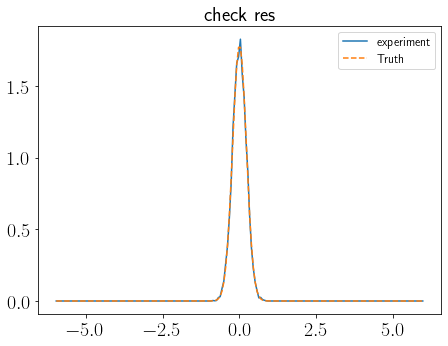

In [4]:
def plot_dist(y,tau,title,ax):
    """
    Input
    -------
    y: np.array
        Samples to visualise
    title: str 
        title of the plot we wish to see
    ax: axis
        On which axis we wish to plot it
    tau: float
        Value of the size of the noise


    Return
    -------
    None: simply plot the distribution
    
    """

    ax.set_title(title)
    #Plot 1
    histogram,bins = np.histogram(y,bins=200,range=[-6,6], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax.plot(midx,histogram,label='experiment')
    rho = np.exp(- (getU(midx)/tau))
    rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) 
    # rho=[rho[i] if i>50 else 0 for i in range(len(rho))]
    ax.plot(midx,rho,'--',label='Truth') 
    ax.legend()
    return histogram
## check resultat
fig, (ax1)= plt.subplots(1,1,figsize=(7,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
hist=plot_dist(y,tau,"check res",ax1)
# x = np.linspace(-1,1,100)
# plt.plot(x,x*x)

### Compare analytical with numerical integration of the true distribution


In [5]:
import scipy.integrate as integrate
def rho(x,tau):
    res = x*x*np.exp(-(getU(x)/tau))
    return res

Z1 = integrate.quad(lambda q: np.exp(-getU(q)/tau), -10,10)[0]
int_num_val = integrate.quadrature(rho,-2,2,args=(tau))[0]/Z1

true_res = tau*0.5
print(int_num_val)
print(true_res)

0.05000000393940881
0.05


### Compute the observable and compare with analytical results

In [6]:
## Error on the observable 

T=100
dt=0.001
tau = 0.1
true_res =0.5*tau
error_obs_nsample=[]
nsample_list =[100,500,1000,2000,5000,10000,100000]
for n_samples in nsample_list:
    y= nsample(n_samples,T,dt,tau)
    num_res = np.sum(y**2)/(n_samples+1)
    error = np.abs(true_res - num_res)
    error_obs_nsample.append(error)

In [7]:
error_obs_dt=[]
dt_list = []
T=10
dt=0.001
tau = 0.1
n_samples = 10**5

for i in range(0,14,2):
    dt = 2**i * 0.0001
    dt_list.append(dt)
    y= nsample(n_samples,T,dt,tau)
    num_res = np.sum(y**2)/(n_samples+1)
    error = np.abs(true_res - num_res)
    error_obs_dt.append(error)

Text(0.5, 0, 'Step size')

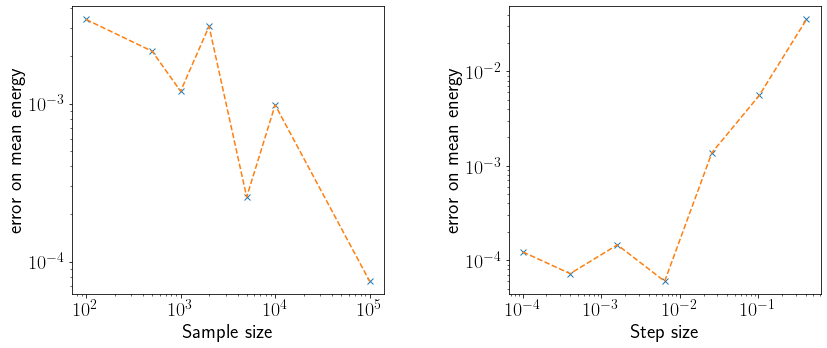

In [8]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(13,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.loglog(nsample_list,error_obs_nsample,"x")
ax1.loglog(nsample_list,error_obs_nsample,"--")
ax1.set_ylabel("error on mean energy")
ax1.set_xlabel("Sample size")
ax2.loglog(dt_list,error_obs_dt,"x")
ax2.loglog(dt_list,error_obs_dt,"--")
ax2.set_ylabel("error on mean energy")
ax2.set_xlabel("Step size")


### Obtain an order of accuracy

In order to obtain an order of accuracy, one can compute the error on the distribution by dividing the true distribution into bins and compute the error on each bins. For the case of the squared potential, we do have an analytical answer, however, we will just use the numerical integration so we can simply adapt thise code afterward to a more general case where we don't get analytical results. 
The weak convergence error consists of two steps, the discretization error and the statistical error, due to the Monte Carlo approximation.
$$
\epsilon = \| \mathbb{E} f(X_t) - \frac{1}{M} \sum_{m=1}^M f(\hat{X}_{N\delta t}^{m}) \| \\
\epsilon \leq \| \mathbb{E} f(X_t) -\mathbb{E} f(\hat{X}_t) \| + \| \mathbb{E} f(\hat{X}_t)  -\frac{1}{M} \sum_{m=1}^M f(\hat{X}_{N\delta t}^{m}) \| \\
\epsilon \leq CN^{- \gamma} + C M^{-1/2}
$$
where the first part is the discretisation error and the second is the discretisation error. 

#### Show that statistical error decreases with order 1/2

-0.44797928264283726


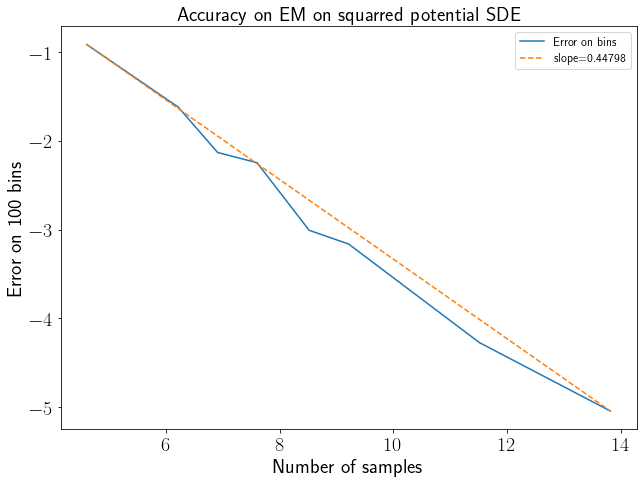

In [9]:
# Compute the accuracte likelihood in the true solution
nbins=10
a=-0.1
b=0.1
Z1 = integrate.quad(lambda q: np.exp(-getU(q)/tau), -10,10)[0]
# Z_bin = integrate.quad(lambda q: np.exp(-getU(q)/tau), a,b)[0]/Z1

# Loop through the solution to obtain an order of accuracy
## Run for a large number of samples
nbins=100
T=10
tau = 0.1
dt=0.01
nsamples=10000
nsample_list =[100,500,1000,2000,5000,10000,100000,1000000]
accuracy_list=[]
for j in nsample_list:
    y= nsample(j,T,dt,tau)
    histogram,bins = np.histogram(y,bins=nbins,range=[-2,2], density=True)
    histogram = histogram/np.sum(histogram)
    error=0
    for i in range(0,len(bins)-1):
        a = bins[i]
        b = bins[i+1]
        Z_bin = integrate.quad(lambda q: np.exp(-getU(q)/tau), a,b)[0]/Z1
        error = error+np.abs(histogram[i]-Z_bin)
    accuracy_list.append(error)

# Compute the slope
logx1=np.log(nsample_list[0])
logx2=np.log(nsample_list[-1])
logy1=np.log(accuracy_list[0])
logy2=np.log(accuracy_list[-1])
a=(logy1-logy2)/(logx1-logx2)
b=logy1-a*logx1
print(a)
x=np.linspace(logx1,logx2,1000)
y_x=a*x+b
a_round=np.round(np.abs(a),5)

fig, (ax1)= plt.subplots(1,1,figsize=(10,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.plot(np.log(nsample_list),np.log(accuracy_list),label="Error on bins")
ax1.plot(x,y_x,"--",label="slope="+str(a_round))
ax1.set_ylabel("Error on "+str(nbins)+" bins")
ax1.set_xlabel("Number of samples")
ax1.set_title("Accuracy on EM on squarred potential SDE")
ax1.legend()

#### Show that discretization error decreases with order 1 with Euler Maruyama

In [10]:
# Compute the accuracte likelihood in the true solution
tau = 0.1

nbins=10
a=-0.1
b=0.1
Z1 = integrate.quad(lambda q: np.exp(-getU(q)/tau), -10,10)[0]
# Z_bin = integrate.quad(lambda q: np.exp(-getU(q)/tau), a,b)[0]/Z1

# Loop through the solution to obtain an order of accuracy
## Run for a large number of samples
nbins=100
T=10
nsamples=10000000
dt_list=[ np.round(2**(-j),5) for j in range(1,8,1)]
accuracy_list=[]
for j in dt_list:
    y= nsample(nsamples,T,j,tau)
    histogram,bins = np.histogram(y,bins=nbins,range=[-2,2], density=True)
    histogram = histogram/np.sum(histogram)
    error=0
    for i in range(0,len(bins)-1):
        a = bins[i]
        b = bins[i+1]
        Z_bin = integrate.quad(lambda q: np.exp(-getU(q)/tau), a,b)[0]/Z1
        error = error+np.abs(histogram[i]-Z_bin)
    accuracy_list.append(error)

In [5]:
logx1=np.log(dt_list[0])
logx2=np.log(dt_list[-1])
logy1=np.log(accuracy_list[0])
logy2=np.log(accuracy_list[-1])
a=(logy1-logy2)/(logx1-logx2)
b=logy1-a*logx1
print(a)
x=np.linspace(logx1,logx2,1000)
y_x=a*x+b
a_round=np.round(np.abs(a),2)

1.0729871085398122


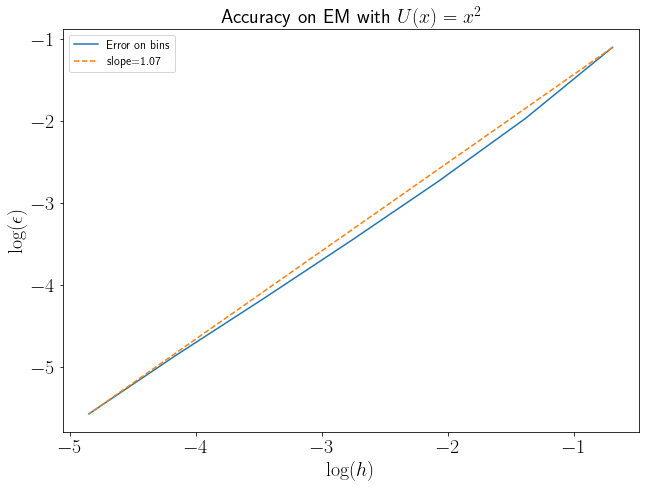

In [6]:
fig, (ax1)= plt.subplots(1,1,figsize=(10,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
ax1.plot(np.log(dt_list),np.log(accuracy_list),label="Error on bins")
ax1.plot(x,y_x,"--",label="slope="+str(a_round))
ax1.set_ylabel("$\log(\epsilon)$")
ax1.set_xlabel("$\log(h)$")
ax1.set_title("Accuracy on EM with $U(x)=x^2$")
ax1.legend()

In [39]:
import scipy.special as ss
def U(x):
    res = x*x
    return res

a=-10
b=10
norm = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
mom1_true = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*np.abs(q), a,b)[0],16)

print(mom1_true)
dt_list=[ np.round(2.5**(-j),5) for j in range(2,8,1)]
dt_list

0.1


[0.16, 0.064, 0.0256, 0.01024, 0.0041, 0.00164]